In [1]:
!nvidia-smi

No devices were found


In [2]:
#%pip install --extra-index-url=https://pypi.nvidia.com cudf-cu12
#%pip install cucim-cu12 cupy-cuda12x

In [3]:
%pip install fastparquet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 16.5 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
#%load_ext cudf.pandas

# To desable GPU usage
#import os
#os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

#from cucim.skimage.exposure import rescale_intensity
import tensorflow as tf
#import cupy as cp
#import torch
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import seaborn as sns
import glob
from sklearn.model_selection import train_test_split
import gc

gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        # memory limit 16GB (16 * 1024 MB = 16384 MB) 
        tf.config.experimental.set_virtual_device_configuration(
            gpus[0],
            [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=16384)] 
        )
        print("Set GPU memory limit to 16GB.")
    except RuntimeError as e:
        print("Error setting memory limit:", e)
else:
    print("No GPUs available.")

#print("Is torch using cuda? ",torch.cuda.is_available())
print("Is tensorflow using cuda? ",tf.test.is_built_with_cuda())
print("Is pandas using cuda? ",pd)


2024-11-30 19:12:07.385920: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-30 19:12:07.421903: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-30 19:12:07.440587: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-30 19:12:07.478771: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


No GPUs available.
Is tensorflow using cuda?  True
Is pandas using cuda?  <module 'pandas' from '/usr/local/lib/python3.11/dist-packages/pandas/__init__.py'>


2024-11-30 19:12:11.232693: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error


In [5]:
name_mapping = [
    "box",
    "circularTorus",
    "cone",
    "coneOffset",
    "cylinder",
    "cylinderSlope",
    "dish",
    "mesh",
    "pyramid",
    "rectangularTorus",
    "sphere"
]

In [6]:
base_path = '/home/workspace/geometry-classifier/data/'

In [7]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

def parse_tfrecord(example_proto):
    """
    Parses a serialized TFRecord example to extract image data and class label.
    """
    feature_description = {
        'name': tf.io.FixedLenFeature([], tf.string),
        'image': tf.io.FixedLenFeature([], tf.string)
    }
    parsed_example = tf.io.parse_single_example(example_proto, feature_description)
    image = tf.io.decode_raw(parsed_example['image'], tf.float32)
    image = tf.reshape(image, (224, 224))  # Reshape to 224x224 (assuming single channel)
    return image

def load_images_from_tfrecord(tfrecord_file, compression_type="GZIP"):
    """
    Loads and decodes all images from a TFRecord file.
    """
    raw_dataset = tf.data.TFRecordDataset(tfrecord_file, compression_type=compression_type)
    images = [parse_tfrecord(record) for record in raw_dataset]
    return images

def visualize_images(images, num_images=9):
    """
    Visualizes a grid of images using Seaborn.
    """
    plt.figure(figsize=(10, 10))
    for i, image in enumerate(images[:num_images]):
        plt.subplot(3, 3, i + 1)  # Create a grid of 3x3
        sns.heatmap(image.numpy(), cmap='gray', cbar=False)  # Display each image using Seaborn
        plt.axis('off')  # Turn off axes
    plt.tight_layout()
    plt.show()

2024-11-30 19:12:13.123272: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


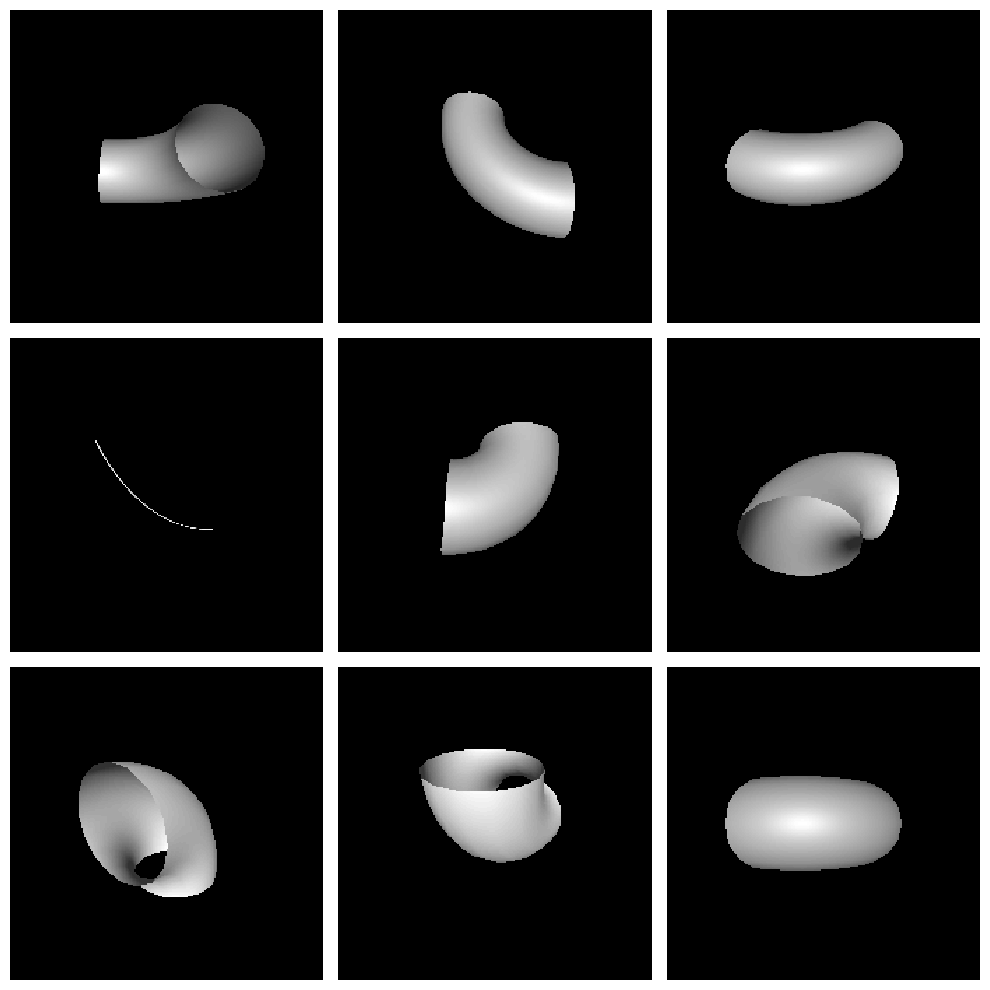

In [8]:
base_path = '/home/workspace/geometry-classifier/data/'


tfrecord_path = base_path+"tfr_strat100-2min/val9.tfrecord.gz"  
images = load_images_from_tfrecord(tfrecord_path)
visualize_images(images, num_images=9)